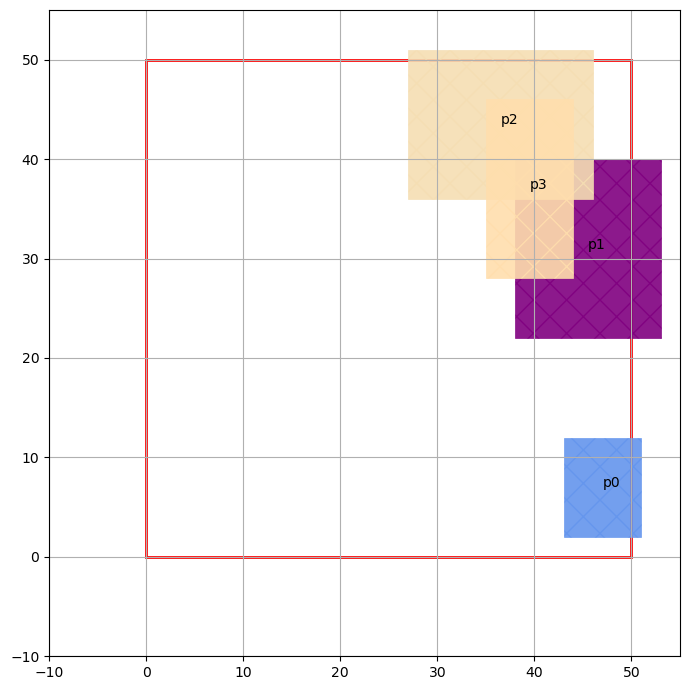

In [9]:
from util import *
from generation import *
from conditions import *

layout_zone         = Rectangle(0,0,50,50)    #{"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
participants        = generate_unconnected_participants(4, layout_zone, 20, 20, 69)
ds_goal             = 15.0

plot_size           = 1.1 * layout_zone.width


a = plot_participants(layout_zone, participants, plot_size, plot_size, plot_connections= True)

In [10]:
participants

Participants(p0=Participant(idx='p0', connections=(), xmin=43, ymin=2, width=8, height=10, clashes=Clashes(p0=0, p1=0, p2=0, p3=0), aversions=Aversions(p0=0, p1=0, p2=0, p3=0), interference=0, overlap_with_idx=(), turmoil=0, relaxed_connections=0, protrusion_status='', protrusion_extend=0, protruded_zone_edges=(), healthy=True, compliant=True, yield_polygon=(), freespace=(), secondary_freespace_north_east=(), secondary_freespace_south_east=(), secondary_freespace_south_west=(), secondary_freespace_north_west=(), last_move='', color='cornflowerblue'), p1=Participant(idx='p1', connections=(), xmin=38, ymin=22, width=15, height=18, clashes=Clashes(p0=0, p1=0, p2=0, p3=0), aversions=Aversions(p0=0, p1=0, p2=0, p3=0), interference=0, overlap_with_idx=(), turmoil=0, relaxed_connections=0, protrusion_status='', protrusion_extend=0, protruded_zone_edges=(), healthy=True, compliant=True, yield_polygon=(), freespace=(), secondary_freespace_north_east=(), secondary_freespace_south_east=(), second

In [11]:
calculate_overlap(participants.p3, participants.p1)

(Rectangle(xmin=38, ymin=28, width=6, height=12),
 [False, False, False, True, False, True])

In [12]:
pstar               = participants.p0

In [13]:
# determine free edges


conditions          = [calculate_lateral_condition(pstar, p , 0.5, 0.5, 100) for p in participants if p.idx != pstar.idx]

masks_edges         = [cond.locations for cond in conditions]

free_edges_bool     = [all(mask[i] for mask in masks_edges) for i in range(4)]

free_edges_str      = [y for (x,y) in zip(free_edges_bool, ['west', 'east', 'north', 'south']) if x]

free_edges_str

['west', 'east', 'north', 'south']

In [14]:
calclulate_free_space(pstar, free_edges_str, participants, layout_zone)

Rectangle(xmin=0, ymin=0, width=50, height=22)

In [15]:
# determine free vertices

overlaps            = [cond.overlap for cond in conditions if cond.overlap]

#print(overlaps)

free_vertices_bool       = calculate_free_corners(pstar, overlaps, layout_zone)

#print(free_vertices_bool)
free_vertices_str   = [y for (x,y) in zip(free_vertices_bool, [('left', 'top'), ('right', 'top'), ('left', 'bottom'), ('right', 'bottom')]) if x]

free_vertices_str

[]


[('left', 'top'), ('left', 'bottom')]

In [16]:
calclulate_all_secondary_free_spaces(pstar, free_vertices_str, participants, layout_zone)

[('left', 'top'), ('left', 'bottom')]
[]
p0
p0


(Rectangle(xmin=0, ymin=0, width=50, height=22),
 (),
 (),
 Rectangle(xmin=0, ymin=0, width=50, height=22))

In [17]:
calculate_conditions(pstar, participants, layout_zone, 0.5, 0.5, 100)

[('left', 'top'), ('left', 'bottom')]
[]
p0
p0


Participant(idx='p0', connections=(), xmin=43, ymin=2, width=8, height=10, clashes=Clashes(p1=0, p2=0, p3=0), aversions=Aversions(p1=0.0, p2=0.0, p3=0.0), interference=0.0, overlap_with_idx=(), turmoil=0.0, relaxed_connections=0, protrusion_status='prone', protrusion_extend=(-1, 0), protruded_zone_edges=('east',), healthy=True, compliant=True, yield_polygon=(), freespace=Rectangle(xmin=0, ymin=0, width=50, height=22), secondary_freespace_north_east=(), secondary_freespace_south_east=(), secondary_freespace_south_west=Rectangle(xmin=0, ymin=0, width=50, height=22), secondary_freespace_north_west=Rectangle(xmin=0, ymin=0, width=50, height=22), last_move='', color='cornflowerblue')

In [18]:
from swarm import *

determine_initial_conditions(participants, layout_zone, 0.5, 100)

[('left', 'top'), ('left', 'bottom')]
[]
p0
p0
[('left', 'bottom')]
[(27, 46), (35, 44)]
p1
[('left', 'bottom')]
[]
p2
[('left', 'bottom')]
[(27, 46)]
p3


Participants(p0=Participant(idx='p0', connections=(), xmin=43, ymin=2, width=8, height=10, clashes=Clashes(p1=0, p2=0, p3=0), aversions=Aversions(p1=0.0, p2=0.0, p3=0.0), interference=0.0, overlap_with_idx=(), turmoil=0.0, relaxed_connections=0, protrusion_status='prone', protrusion_extend=(-1, 0), protruded_zone_edges=('east',), healthy=True, compliant=True, yield_polygon=(), freespace=Rectangle(xmin=0, ymin=0, width=50, height=22), secondary_freespace_north_east=(), secondary_freespace_south_east=(), secondary_freespace_south_west=Rectangle(xmin=0, ymin=0, width=50, height=22), secondary_freespace_north_west=Rectangle(xmin=0, ymin=0, width=50, height=22), last_move='', color='cornflowerblue'), p1=Participant(idx='p1', connections=(), xmin=38, ymin=22, width=15, height=18, clashes=Clashes(p0=0, p2=1, p3=1), aversions=Aversions(p0=0.0, p2=9120, p3=11664), interference=20784.0, overlap_with_idx=('p2', 'p3'), turmoil=0.0, relaxed_connections=0, protrusion_status='prone', protrusion_exten